# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### **WeatherPy-Latitude-Analysis**

**Creation of an automated script that randomly selects 500+ cities around the world and pulls weather data from OpenWeatherMap API outputting scatter plot comparisons of different weather metrics.**

- As a general trend the hottest temperatures occurred near the equator. Interestingly, the hottest temperatures grouped around latitudes (+20 degrees) slightly north of the equator.

- The highest humidity on average was at the equator. The scatter plot data showed a reduction in the variance of percent humidity centered at the equator within a range of +20 and -20 degrees latitude.

- There was not a strong connection between city latitude and wind speed. The scatter plot data showed a modest reduction in the variance of wind speed centered at the equator. Some of the windiest cities occurred in latitudes farthest from the equator.

- There was no correlation between city latitude and the cloudiness of a city. Interestingly, the likelihood of an equatorial city cloudiness (%) near zero was very low.

In summary, these data suggest that on average the closer a city is to the equator the higher the temperature and more humid the city is likely to be. Additionally, there may be a weak association between lower wind speeds or low cloud cover and proximity to the equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
cities

['ixtapa',
 'kruisfontein',
 'belaya gora',
 'vaini',
 'misratah',
 'tura',
 'broome',
 'nandgaon',
 'tasiilaq',
 'new norfolk',
 'sentyabrskiy',
 'port macquarie',
 'kapit',
 'isiro',
 'smithers',
 'sinnamary',
 'taolanaro',
 'koumac',
 'ushuaia',
 'eyl',
 'maragogi',
 'hobart',
 'half moon bay',
 'busselton',
 'troitsko-pechorsk',
 'rikitea',
 'leningradskiy',
 'hami',
 'puerto escondido',
 'butaritari',
 'north bend',
 'arlit',
 'ventspils',
 'sao joao da barra',
 'punta arenas',
 'chuy',
 'marsa matruh',
 'victoria',
 'karratha',
 'mataura',
 'nantucket',
 'koudougou',
 'bambous virieux',
 'vardo',
 'san jeronimo',
 'saskylakh',
 'port alfred',
 'petropavlovka',
 'khatanga',
 'carnarvon',
 'avarua',
 'edd',
 'bluff',
 'kapaa',
 'miyang',
 'karabulak',
 'chokurdakh',
 'obo',
 'kassala',
 'atuona',
 'rungata',
 'srednekolymsk',
 'luderitz',
 'antofagasta',
 'cherskiy',
 'wahpeton',
 'arraial do cabo',
 'salalah',
 'bilibino',
 'noumea',
 'albany',
 'cockburn town',
 'upernavik',
 'ye

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
#query_url

#city_test = "ixtapa"
#response_test = requests.get(query_url + city_test).json()
#print(json.dumps(response_test, indent=4, sort_keys=True))

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_number = 0
index_set = 1

print("Beginning Data Retrieval")
print("----------------------------")

        
for city in cities:
    response = requests.get(query_url + city).json()
    #print(json.dumps(response, indent=4, sort_keys=True))
    
    if index_number >= 50:
        index_number = 0
        index_set = index_set + 1
    else:  

        try:
            name.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            max_temp.append(response["main"]["temp_max"])
            wind_speed.append(response["wind"]["speed"])
        
            index_number = index_number + 1
          
            print(f'Processing Record {index_number} of Set {index_set} | {city}')
           
        except KeyError:    
            print("City not found. Skipping... ")

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | ixtapa
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | belaya gora
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | misratah
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | broome
Processing Record 8 of Set 1 | nandgaon
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | new norfolk
City not found. Skipping... 
Processing Record 11 of Set 1 | port macquarie
Processing Record 12 of Set 1 | kapit
Processing Record 13 of Set 1 | isiro
Processing Record 14 of Set 1 | smithers
Processing Record 15 of Set 1 | sinnamary
City not found. Skipping... 
Processing Record 16 of Set 1 | koumac
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | eyl
Processing Record 19 of Set 1 | maragogi
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | half moon bay
Processing Record 22 of Set 1 | busselton

Processing Record 37 of Set 4 | guangyuan
City not found. Skipping... 
Processing Record 38 of Set 4 | padilla
City not found. Skipping... 
Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | oussouye
Processing Record 41 of Set 4 | puerto del rosario
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | serdobsk
Processing Record 44 of Set 4 | san cristobal
Processing Record 45 of Set 4 | svetlogorsk
Processing Record 46 of Set 4 | skaudvile
Processing Record 47 of Set 4 | palmer
Processing Record 48 of Set 4 | gushikawa
City not found. Skipping... 
Processing Record 49 of Set 4 | bayir
City not found. Skipping... 
City not found. Skipping... 
Processing Record 50 of Set 4 | ayagoz
Processing Record 1 of Set 5 | hithadhoo
Processing Record 2 of Set 5 | verkhnyaya toyma
Processing Record 3 of Set 5 | bourail
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | uarini
Processing Record 6 of Set 5 | minbu
City not found. Skipping

Processing Record 15 of Set 8 | cururupu
Processing Record 16 of Set 8 | karasuk
City not found. Skipping... 
Processing Record 17 of Set 8 | shingu
City not found. Skipping... 
Processing Record 18 of Set 8 | garowe
Processing Record 19 of Set 8 | miastko
Processing Record 20 of Set 8 | alice springs
Processing Record 21 of Set 8 | seydi
Processing Record 22 of Set 8 | fukue
Processing Record 23 of Set 8 | najran
Processing Record 24 of Set 8 | maraba
Processing Record 25 of Set 8 | sungaipenuh
Processing Record 26 of Set 8 | presidente epitacio
Processing Record 27 of Set 8 | ettaiyapuram
Processing Record 28 of Set 8 | auki
Processing Record 29 of Set 8 | caravelas
Processing Record 30 of Set 8 | adrar
Processing Record 31 of Set 8 | trairi
Processing Record 32 of Set 8 | kasulu
Processing Record 33 of Set 8 | esmeralda
Processing Record 34 of Set 8 | hauterive
City not found. Skipping... 
Processing Record 35 of Set 8 | qaqortoq
Processing Record 36 of Set 8 | ortona
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(r'output_data/cities.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ixtapa,5,MX,1559155506,65,20.71,-105.21,84.00,8.05
1,Kruisfontein,9,ZA,1559156077,80,-34.00,24.73,56.14,6.67
2,Belaya Gora,47,RU,1559155545,52,68.54,146.19,48.58,18.34
3,Vaini,92,IN,1559155801,81,15.34,74.49,82.24,3.15
4,Misratah,65,LY,1559155795,71,32.38,15.09,71.08,13.02


In [8]:
weather_data.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

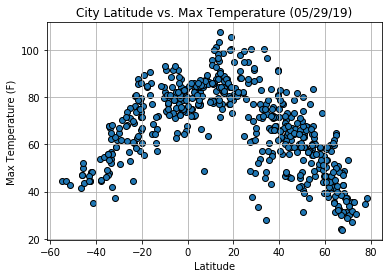

In [15]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"], edgecolors='k')
plt.grid()
plt.title("City Latitude vs. Max Temperature (05/29/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("images/City_Lat_v_Max_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

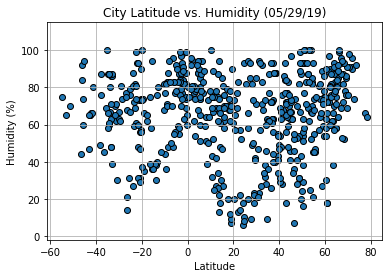

In [16]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"], edgecolors='k')
plt.grid()
plt.title("City Latitude vs. Humidity (05/29/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-2, 115)
plt.savefig("images/City_Lat_v_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

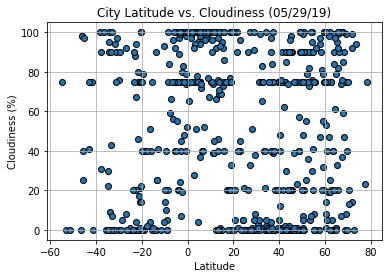

In [17]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"], edgecolors='k')
plt.grid()
plt.title("City Latitude vs. Cloudiness (05/29/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("images/City_Lat_v_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

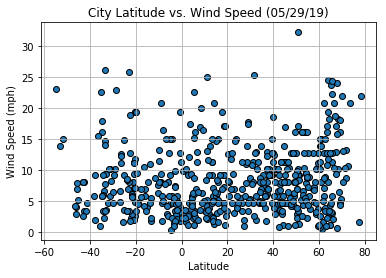

In [18]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"], edgecolors='k')
plt.grid()
plt.title("City Latitude vs. Wind Speed (05/29/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("images/City_Lat_v_Wind_Speed.png")
plt.show()